# Humpback Whale Identification - CNN with Keras
This kernel is based on [Anezka Kolaceke](https://www.kaggle.com/anezka)'s awesome work: [CNN with Keras for Humpback Whale ID](https://www.kaggle.com/anezka/cnn-with-keras-for-humpback-whale-id)

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model

import keras.backend as K
from keras.models import Sequential

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

Using TensorFlow backend.


In [2]:
os.listdir("../input/")

['train.csv', 'test', 'train', 'sample_submission.csv']

In [3]:
train_df = pd.read_csv("../input/train.csv")
train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [4]:
def prepareImages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img("../input/"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X_train

In [5]:
def prepare_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    # print(onehot_encoded)

    y = onehot_encoded
    # print(y.shape)
    return y, label_encoder

In [6]:
X = prepareImages(train_df, train_df.shape[0], "train")
X /= 255
#preparing for images! Using code above

Preparing images
Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg

In [7]:
print(X[-1].shape)

(100, 100, 3)


In [8]:
y, label_encoder = prepare_labels(train_df['Id'])

In [9]:
y.shape

(25361, 5005)

In [10]:
model = Sequential()

model.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool'))
model.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3), name='avg_pool'))

model.add(Flatten())
model.add(Dense(500, activation="relu", name='rl'))
model.add(Dropout(0.8))
model.add(Dense(y.shape[1], activation='softmax', name='sm'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 94, 94, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 94, 94, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 47, 47, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 45, 45, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 45, 45, 64)        0         
_________________________________________________________________
avg_pool (AveragePooling2D)  (None, 15, 15, 64)        0         
__________

In [11]:
history = model.fit(X, y, epochs=100, batch_size=100, verbose=1)
gc.collect()

Epoch 1/100
25361/25361 [==============================] - 17s 690us/step - loss: 6.2120 - acc: 0.3795
Epoch 2/100
25361/25361 [==============================] - 11s 415us/step - loss: 5.9567 - acc: 0.3811
Epoch 3/100
25361/25361 [==============================] - 11s 415us/step - loss: 5.8388 - acc: 0.3811
Epoch 4/100
25361/25361 [==============================] - 11s 414us/step - loss: 5.7735 - acc: 0.3811
Epoch 5/100
25361/25361 [==============================] - 11s 414us/step - loss: 5.7279 - acc: 0.3811
Epoch 6/100
25361/25361 [==============================] - 10s 413us/step - loss: 5.6960 - acc: 0.3811
Epoch 7/100
25361/25361 [==============================] - 11s 416us/step - loss: 5.6648 - acc: 0.3811
Epoch 8/100
25361/25361 [==============================] - 11s 414us/step - loss: 5.6360 - acc: 0.3811
Epoch 9/100
25361/25361 [==============================] - 10s 414us/step - loss: 5.6156 - acc: 0.3811
Epoch 10/100
25361/25361 [==============================] - 11s 414us/ste

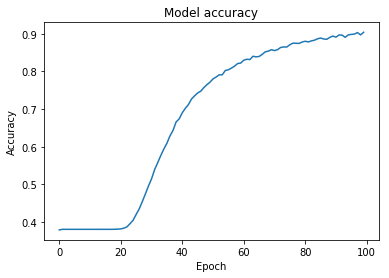

In [12]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [13]:
test = os.listdir("../input/test/")
print(len(test))

7960


In [14]:
col = ['Image']
test_df = pd.DataFrame(test, columns=col)
test_df['Id'] = ''

In [15]:
X = prepareImages(test_df, test_df.shape[0], "test")
X /= 255

Preparing images
Processing image:  1 ,  a8d699496.jpg
Processing image:  501 ,  404b52ee2.jpg
Processing image:  1001 ,  579a73502.jpg
Processing image:  1501 ,  9ecf3864e.jpg
Processing image:  2001 ,  d27634ad5.jpg
Processing image:  2501 ,  9d91ee409.jpg
Processing image:  3001 ,  c42ce68fe.jpg
Processing image:  3501 ,  5939b97bb.jpg
Processing image:  4001 ,  df5baee3a.jpg
Processing image:  4501 ,  51e30cc38.jpg
Processing image:  5001 ,  2426118d7.jpg
Processing image:  5501 ,  cc47b0982.jpg
Processing image:  6001 ,  93589894e.jpg
Processing image:  6501 ,  6a1d97b70.jpg
Processing image:  7001 ,  c71a1ec7a.jpg
Processing image:  7501 ,  75ec832d0.jpg


In [16]:
predictions = model.predict(np.array(X), verbose=1)

7960/7960 [==============================] - 2s 264us/step


In [17]:
for i, pred in enumerate(predictions):
    test_df.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

In [18]:
test_df.head(10)
test_df.to_csv('submission.csv', index=False)

In [19]:
print(test_df)

              Image                                                 Id
0     a8d699496.jpg  new_whale w_5a2634c w_dee1053 w_0a155b9 w_23a388d
1     1e75d9abc.jpg  new_whale w_88e4537 w_a9304b9 w_a113b33 w_fccccec
2     f0335d0de.jpg  new_whale w_88e4537 w_0369a5c w_714f89f w_f61b957
3     2cb21412f.jpg  new_whale w_564a34b w_cc1784d w_8c25681 w_990921b
4     1d6701d80.jpg  new_whale w_242fb46 w_1ca9ab1 w_23a388d w_ec16cc4
5     879370ff2.jpg  new_whale w_cc1784d w_c6b4d61 w_af367c3 w_778e474
6     aeb3a9793.jpg  new_whale w_88e4537 w_23a388d w_fd3e556 w_9b5109b
7     555c26a3f.jpg  new_whale w_a9304b9 w_16df050 w_4690940 w_3de579a
8     84092b852.jpg  new_whale w_a9304b9 w_d236b51 w_9b5109b w_343f088
9     c85b4651a.jpg  new_whale w_c55c51d w_6cda039 w_23a388d w_60ce6fc
10    b03f53642.jpg  new_whale w_34ecf36 w_36bbd71 w_28c330c w_88e4537
11    b91284206.jpg  new_whale w_3de579a w_343f088 w_a113b33 w_9e3859e
12    b9809a2ad.jpg  new_whale w_5773c71 w_fd6a3ad w_23a388d w_d573a68
13    